In [2]:
# Imports
import os
import pandas as pd
import numpy as np
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import json
from collections import Counter

In [3]:
with open('/Users/battemuulen/Documents/GitHub/DataScienceThesis/Datasets/MFTC_corpus.json', 'r') as f:
    ds_twitter = json.load(f)

In [5]:
#We need to covert this into json nested dictionary format into csv file for easier visualization and data manipulation later on
df = pd.DataFrame(ds_twitter)  
df.head(10)

,Corpus,Tweets
0,ALM,"[{'tweet_id': '521033092132503552', 'tweet_tex..."
1,Baltimore,"[{'tweet_id': '593899776564944897', 'tweet_tex..."
2,BLM,"[{'tweet_id': '734202176684298240', 'tweet_tex..."
3,Davidson,"[{'tweet_id': '5', 'tweet_text': '!!!!!!!!!!!!..."
4,Election,"[{'tweet_id': '509464992404357120', 'tweet_tex..."
5,MeToo,"[{'tweet_id': '48430014437122048', 'tweet_text..."
6,Sandy,"[{'tweet_id': '258018822945120256', 'tweet_tex..."


In [7]:
def process_twitter_data(json_data):
    flattened_data = []
    #Process each corpus in the list
    for corpus_item in json_data:
        corpus_name = corpus_item.get('Corpus', '')
        tweets_list = corpus_item.get('Tweets', [])
        
        #Process each tweet in the corpus
        for tweet in tweets_list:
            tweet_id = tweet.get('tweet_id', '')
            tweet_text = tweet.get('tweet_text', '')
            annotations = tweet.get('annotations', [])
            
            #Create a row for each annotation, similar to Reddit df format
            for anno_dict in annotations:
                annotator = anno_dict.get('annotator', '')
                annotation = anno_dict.get('annotation', '')
                
                flattened_data.append({
                    'text': tweet_text,
                    'corpus': corpus_name,
                    'tweet_id': tweet_id,
                    'annotator': annotator,
                    'annotation': annotation
                })
    
    return pd.DataFrame(flattened_data)


#Create a flattened dataframe
df_twitter = process_twitter_data(ds_twitter)
output_path = '/Users/battemuulen/Documents/GitHub/DataScienceThesis/Datasets/MFTC_corpus_cleaned_format.csv'
df_twitter.to_csv(output_path, index=False)

In [9]:
df_twitter

,text,corpus,tweet_id,annotator,annotation
0,@fergusonoctober @FOX2now #AllLivesMatter Peac...,ALM,521033092132503552,annotator00,care
1,@fergusonoctober @FOX2now #AllLivesMatter Peac...,ALM,521033092132503552,annotator01,"care,purity"
2,@fergusonoctober @FOX2now #AllLivesMatter Peac...,ALM,521033092132503552,annotator02,"care,purity"
3,@fergusonoctober @FOX2now #AllLivesMatter Peac...,ALM,521033092132503552,annotator03,care
4,Wholeheartedly support these protests & acts o...,ALM,537681598989475841,annotator00,subversion
...,...,...,...,...,...
128449,AT_USER Price gouging looting and rage Sandy c...,Sandy,265598221462687744,annotator09,"subversion,cheating"
128450,AT_USER Price gouging looting and rage Sandy c...,Sandy,265598221462687744,annotator11,cheating
128451,Might devastated Sandy victims lose the oppurt...,Sandy,265600333068238849,annotator10,cheating
128452,Might devastated Sandy victims lose the oppurt...,Sandy,265600333068238849,annotator09,"cheating,harm"


In [10]:
def capitalize_annotations(annotation_str):
    if pd.isna(annotation_str):
        return annotation_str
    
    annotations = annotation_str.split(',')
    capitalized_annotations = [ann.capitalize() for ann in annotations]
    return ','.join(capitalized_annotations)

df_twitter['annotation'] = df_twitter['annotation'].apply(capitalize_annotations)


In [11]:
df_twitter

,text,corpus,tweet_id,annotator,annotation
0,@fergusonoctober @FOX2now #AllLivesMatter Peac...,ALM,521033092132503552,annotator00,Care
1,@fergusonoctober @FOX2now #AllLivesMatter Peac...,ALM,521033092132503552,annotator01,"Care,Purity"
2,@fergusonoctober @FOX2now #AllLivesMatter Peac...,ALM,521033092132503552,annotator02,"Care,Purity"
3,@fergusonoctober @FOX2now #AllLivesMatter Peac...,ALM,521033092132503552,annotator03,Care
4,Wholeheartedly support these protests & acts o...,ALM,537681598989475841,annotator00,Subversion
...,...,...,...,...,...
128449,AT_USER Price gouging looting and rage Sandy c...,Sandy,265598221462687744,annotator09,"Subversion,Cheating"
128450,AT_USER Price gouging looting and rage Sandy c...,Sandy,265598221462687744,annotator11,Cheating
128451,Might devastated Sandy victims lose the oppurt...,Sandy,265600333068238849,annotator10,Cheating
128452,Might devastated Sandy victims lose the oppurt...,Sandy,265600333068238849,annotator09,"Cheating,Harm"


In [12]:
df_twitter[df_twitter['annotation'] == 'Fairness']

,text,corpus,tweet_id,annotator,annotation
9,This Sandra Bland situation man no disrespect ...,ALM,624644420705648640,annotator01,Fairness
31,Liberty and Justice for all? How about opportu...,ALM,636902749657919489,annotator00,Fairness
34,Liberty and Justice for all? How about opportu...,ALM,636902749657919489,annotator03,Fairness
72,Where justice is denied... #AllLivesMatter #Mi...,ALM,543905079133495296,annotator01,Fairness
86,Equality is key. #AllLivesMatter pray over eve...,ALM,624203733946269696,annotator00,Fairness
...,...,...,...,...,...
128377,HurricaneSandy Pastor blames hurricane Sandy o...,Sandy,265556896772153344,annotator09,Fairness
128396,AT_USER please prosecute any caught scamming v...,Sandy,265563355438260225,annotator11,Fairness
128408,Disaster Fraud it happens report Sandy fraud t...,Sandy,265572715828740096,annotator11,Fairness
128445,After losing the election to 2 unisex names ma...,Sandy,265597069891338242,annotator10,Fairness


In [14]:
df_twitter[df_twitter['annotation'] == 'Non-moral']

,text,corpus,tweet_id,annotator,annotation
28,Black Twitter when they see someone tweet #All...,ALM,676436368268984320,annotator00,Non-moral
29,Black Twitter when they see someone tweet #All...,ALM,676436368268984320,annotator01,Non-moral
30,Black Twitter when they see someone tweet #All...,ALM,676436368268984320,annotator03,Non-moral
37,"Took a long time, no? Doctors Strive to Do Les...",ALM,568112472542064640,annotator02,Non-moral
39,Yes RT @arthur_affect:Do ppl who change #Black...,ALM,540400187458351105,annotator00,Non-moral
...,...,...,...,...,...
128360,Awfulness longbeachny lbny hurricanesandy sand...,Sandy,265548516196241408,annotator11,Non-moral
128366,Physical distress lack of supplies amp uncerta...,Sandy,265550854172585985,annotator11,Non-moral
128399,Political delusions the reality behind Electio...,Sandy,265563738067853312,annotator11,Non-moral
128429,AT_USER who cares 3village forgotten sandy nos...,Sandy,265584076939997184,annotator11,Non-moral


In [15]:
df_twitter[df_twitter['annotation'] == 'Care']

,text,corpus,tweet_id,annotator,annotation
0,@fergusonoctober @FOX2now #AllLivesMatter Peac...,ALM,521033092132503552,annotator00,Care
3,@fergusonoctober @FOX2now #AllLivesMatter Peac...,ALM,521033092132503552,annotator03,Care
12,"Commitment to peace, healing and loving neighb...",ALM,752979765984890884,annotator00,Care
15,"Commitment to peace, healing and loving neighb...",ALM,752979765984890884,annotator03,Care
20,This is what compassion looks like! #vegan #Al...,ALM,753261224737898497,annotator00,Care
...,...,...,...,...,...
128347,Social media strategy for DoGood orgs best kin...,Sandy,265546939033079810,annotator09,Care
128354,OccupySandy Efforts Highlight Need for Solidar...,Sandy,266228756748840960,annotator11,Care
128371,Please help the victims of Sandy Their resilie...,Sandy,265554820327432194,annotator09,Care
128372,Please help the victims of Sandy Their resilie...,Sandy,265554820327432194,annotator11,Care


In [16]:
df_twitter[df_twitter['annotation'] == 'Loyalty']

,text,corpus,tweet_id,annotator,annotation
6,Wholeheartedly support these protests & acts o...,ALM,537681598989475841,annotator02,Loyalty
17,Injustice for one is an injustice for all #All...,ALM,548029362348765185,annotator01,Loyalty
25,@CNNPolitics @IngrahamAngle @phucbho @b_fung t...,ALM,751971806265810944,annotator01,Loyalty
32,Liberty and Justice for all? How about opportu...,ALM,636902749657919489,annotator01,Loyalty
56,Love each other.......respect our differences....,ALM,756669445775384576,annotator01,Loyalty
...,...,...,...,...,...
128373,Please help the victims of Sandy Their resilie...,Sandy,265554833816289281,annotator10,Loyalty
128403,AT_USER AT_USER Rep voter supp efforts in Flor...,Sandy,265571321507885058,annotator10,Loyalty
128406,Disaster Fraud it happens report Sandy fraud t...,Sandy,265572715828740096,annotator10,Loyalty
128417,There needs to be a proper balance between ind...,Sandy,265575569868066816,annotator11,Loyalty


In [17]:
df_twitter[df_twitter['annotation'] == 'Authority']

,text,corpus,tweet_id,annotator,annotation
141,THIS! ↓ #BlackLivesMatter https://twitter.com/...,ALM,639295319218483200,annotator00,Authority
144,THIS! ↓ #BlackLivesMatter https://twitter.com/...,ALM,639295319218483200,annotator03,Authority
146,"African-Americans support decent, non-racist, ...",ALM,696855546175959040,annotator01,Authority
174,How is de Blasio's encouragement of peaceful p...,ALM,547086823043137537,annotator01,Authority
180,#AllLivesMatter treat yourselves with respect ...,ALM,592818576639336448,annotator03,Authority
...,...,...,...,...,...
128388,AT_USER as a conservative it is important to p...,Sandy,265561123753951232,annotator10,Authority
128389,AT_USER as a conservative it is important to p...,Sandy,265561123753951232,annotator09,Authority
128390,AT_USER as a conservative it is important to p...,Sandy,265561123753951232,annotator11,Authority
128425,AT_USER the US citizens respect your speedy re...,Sandy,265580228515090434,annotator09,Authority


In [22]:
df_twitter['annotation'] = df_twitter['annotation'].apply(lambda x: 
    ','.join([ann.capitalize() for ann in x.split(',')]) if isinstance(x, str) else x)

def contains_only_specified_values(annotation_str):
    if not isinstance(annotation_str, str):
        return False
    
    valid_values = {'Non-moral', 'Care', 'Fairness', 'Loyalty', 'Authority'}
    annotations = set(annotation_str.split(','))
    
    return annotations.issubset(valid_values)

filtered_df = df_twitter[df_twitter['annotation'].apply(contains_only_specified_values)]

sorted_df = filtered_df.sort_values(by=['annotation', 'corpus'])

sorted_df.to_csv('filtered_moral_annotations_MFTC.csv', index=False)

print(f"Filtered dataframe has {len(sorted_df)} rows")
print(sorted_df.head())


Filtered dataframe has 81972 rows
                                                  text corpus  \
141  THIS! ↓ #BlackLivesMatter https://twitter.com/...    ALM   
144  THIS! ↓ #BlackLivesMatter https://twitter.com/...    ALM   
146  African-Americans support decent, non-racist, ...    ALM   
174  How is de Blasio's encouragement of peaceful p...    ALM   
180  #AllLivesMatter treat yourselves with respect ...    ALM   

               tweet_id    annotator annotation  
141  639295319218483200  annotator00  Authority  
144  639295319218483200  annotator03  Authority  
146  696855546175959040  annotator01  Authority  
174  547086823043137537  annotator01  Authority  
180  592818576639336448  annotator03  Authority  


In [23]:
sorted_df

,text,corpus,tweet_id,annotator,annotation
141,THIS! ↓ #BlackLivesMatter https://twitter.com/...,ALM,639295319218483200,annotator00,Authority
144,THIS! ↓ #BlackLivesMatter https://twitter.com/...,ALM,639295319218483200,annotator03,Authority
146,"African-Americans support decent, non-racist, ...",ALM,696855546175959040,annotator01,Authority
174,How is de Blasio's encouragement of peaceful p...,ALM,547086823043137537,annotator01,Authority
180,#AllLivesMatter treat yourselves with respect ...,ALM,592818576639336448,annotator03,Authority
...,...,...,...,...,...
103222,"Leftists cannot admit the kindness of the man,...",MeToo,23548791885783043,annotator22,"Non-moral,Care,Authority"
100326,Learn German with Babbel - Babbel is supported...,MeToo,57666318416859136,annotator17,"Non-moral,Care,Loyalty"
112662,https://mobile.nytimes.com/2017/11/30/us/polit...,MeToo,36584379740155904,annotator01,"Non-moral,Fairness"
104153,Who\u2019s @realDonaldTrump loyal to?\n,MeToo,85725148568440832,annotator18,"Non-moral,Loyalty"


In [33]:
plt.style.use('ggplot')  # Using a more common style
colors = sns.color_palette('viridis', 5)
fig_size = (20, 16)
text_color = '#333333'
title_font = {'fontsize': 16, 'fontweight': 'bold', 'color': text_color}
label_font = {'fontsize': 12, 'color': text_color}

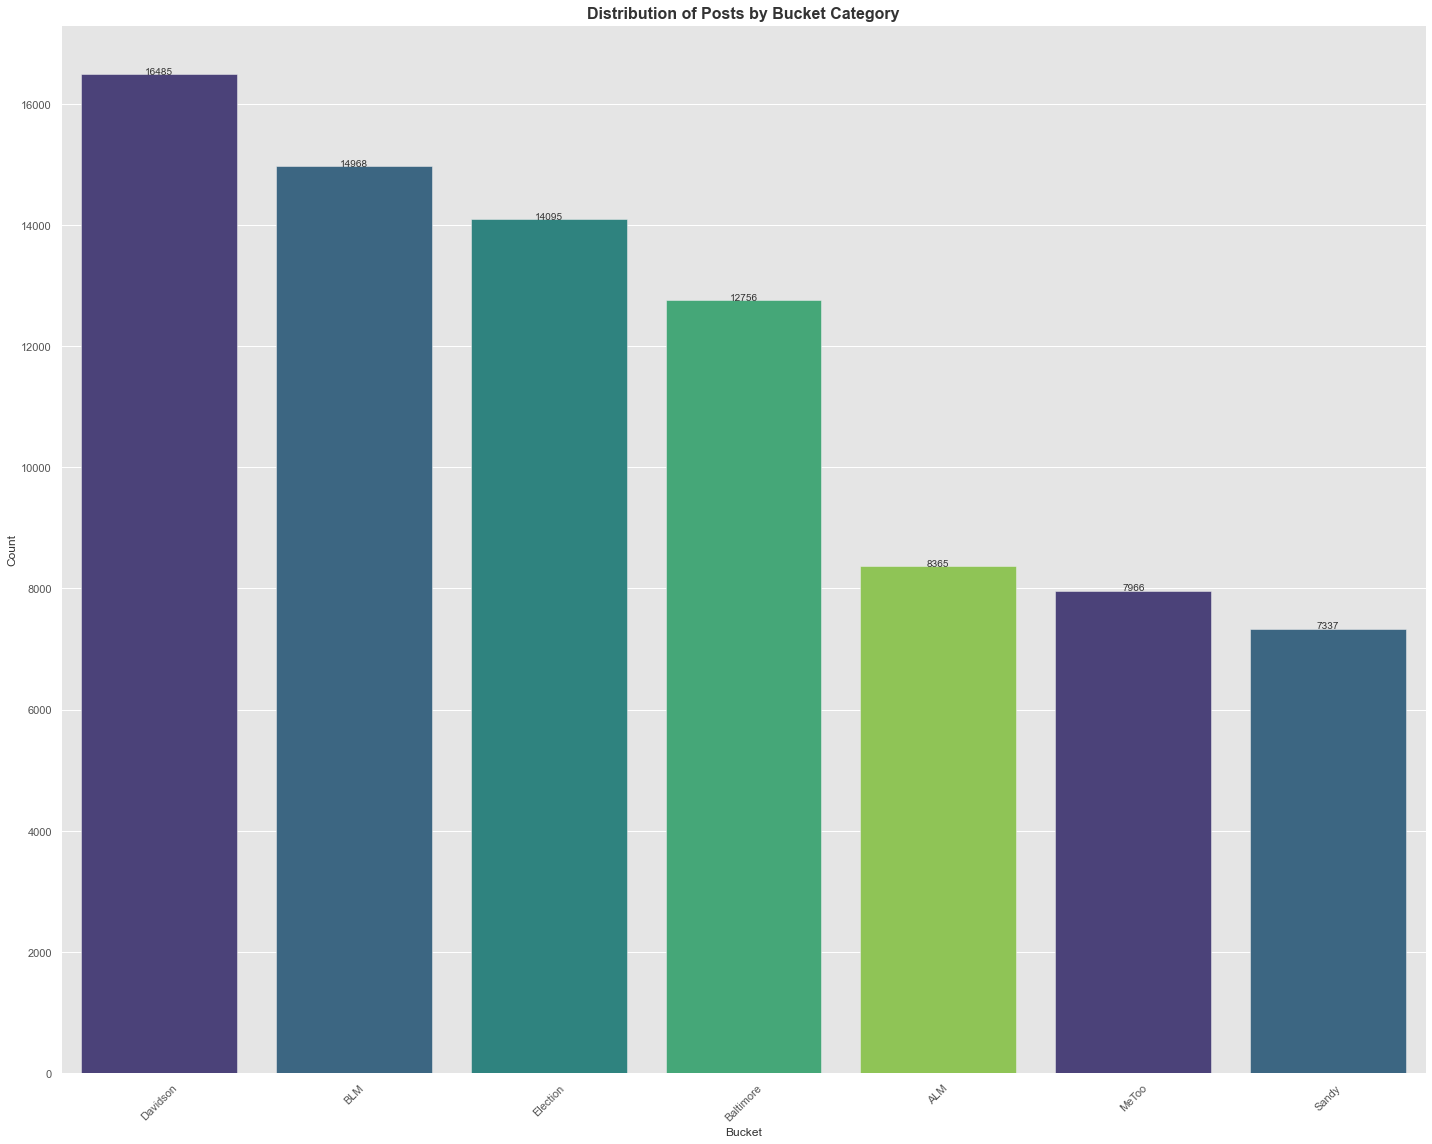

In [35]:
plt.figure(figsize=fig_size)
bucket_counts = sorted_df['corpus'].value_counts()
ax = sns.barplot(x=bucket_counts.index, y=bucket_counts.values, palette=colors)
plt.title('Distribution of Posts by Bucket Category', fontdict=title_font)
plt.xlabel('Bucket', fontdict=label_font)
plt.ylabel('Count', fontdict=label_font)
plt.xticks(rotation=45)
for i, count in enumerate(bucket_counts.values):
    ax.text(i, count + 5, str(count), ha='center', color=text_color)
plt.tight_layout()
plt.show()

<Figure size 1440x1152 with 0 Axes>

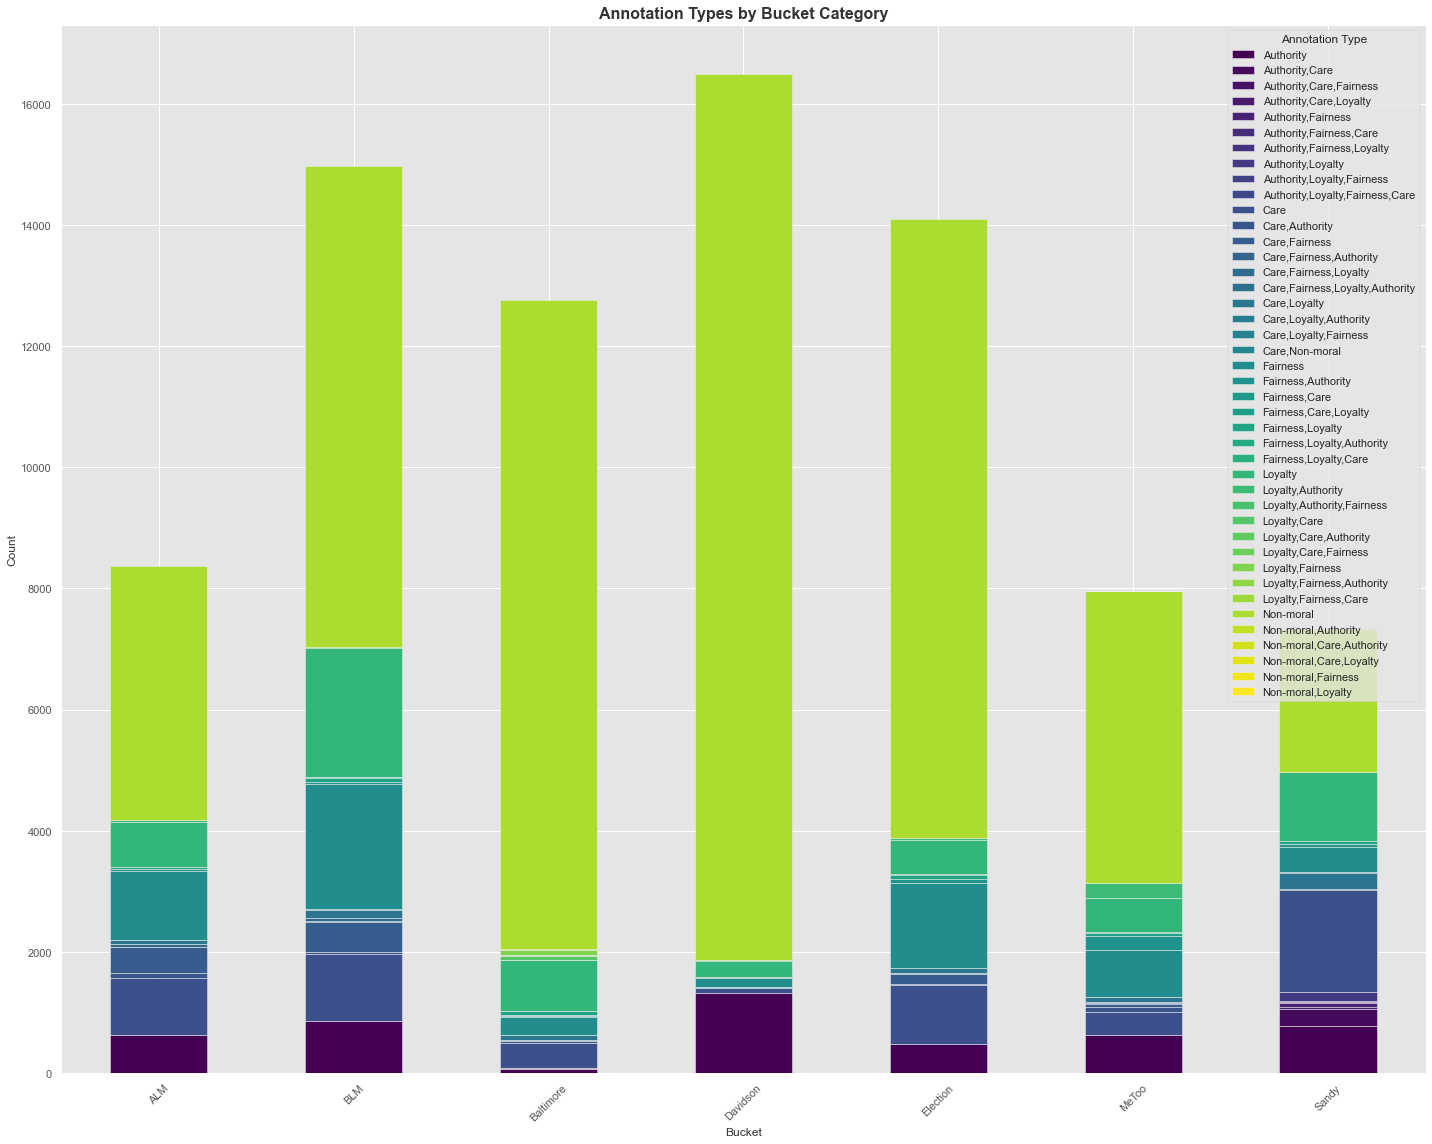

In [34]:
plt.figure(figsize=fig_size)
annotation_by_bucket = pd.crosstab(sorted_df['corpus'], sorted_df['annotation'])
annotation_by_bucket.plot(kind='bar', stacked=True, colormap='viridis', figsize=fig_size)
plt.title('Annotation Types by Bucket Category', fontdict=title_font)
plt.xlabel('Bucket', fontdict=label_font)
plt.ylabel('Count', fontdict=label_font)
plt.legend(title='Annotation Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

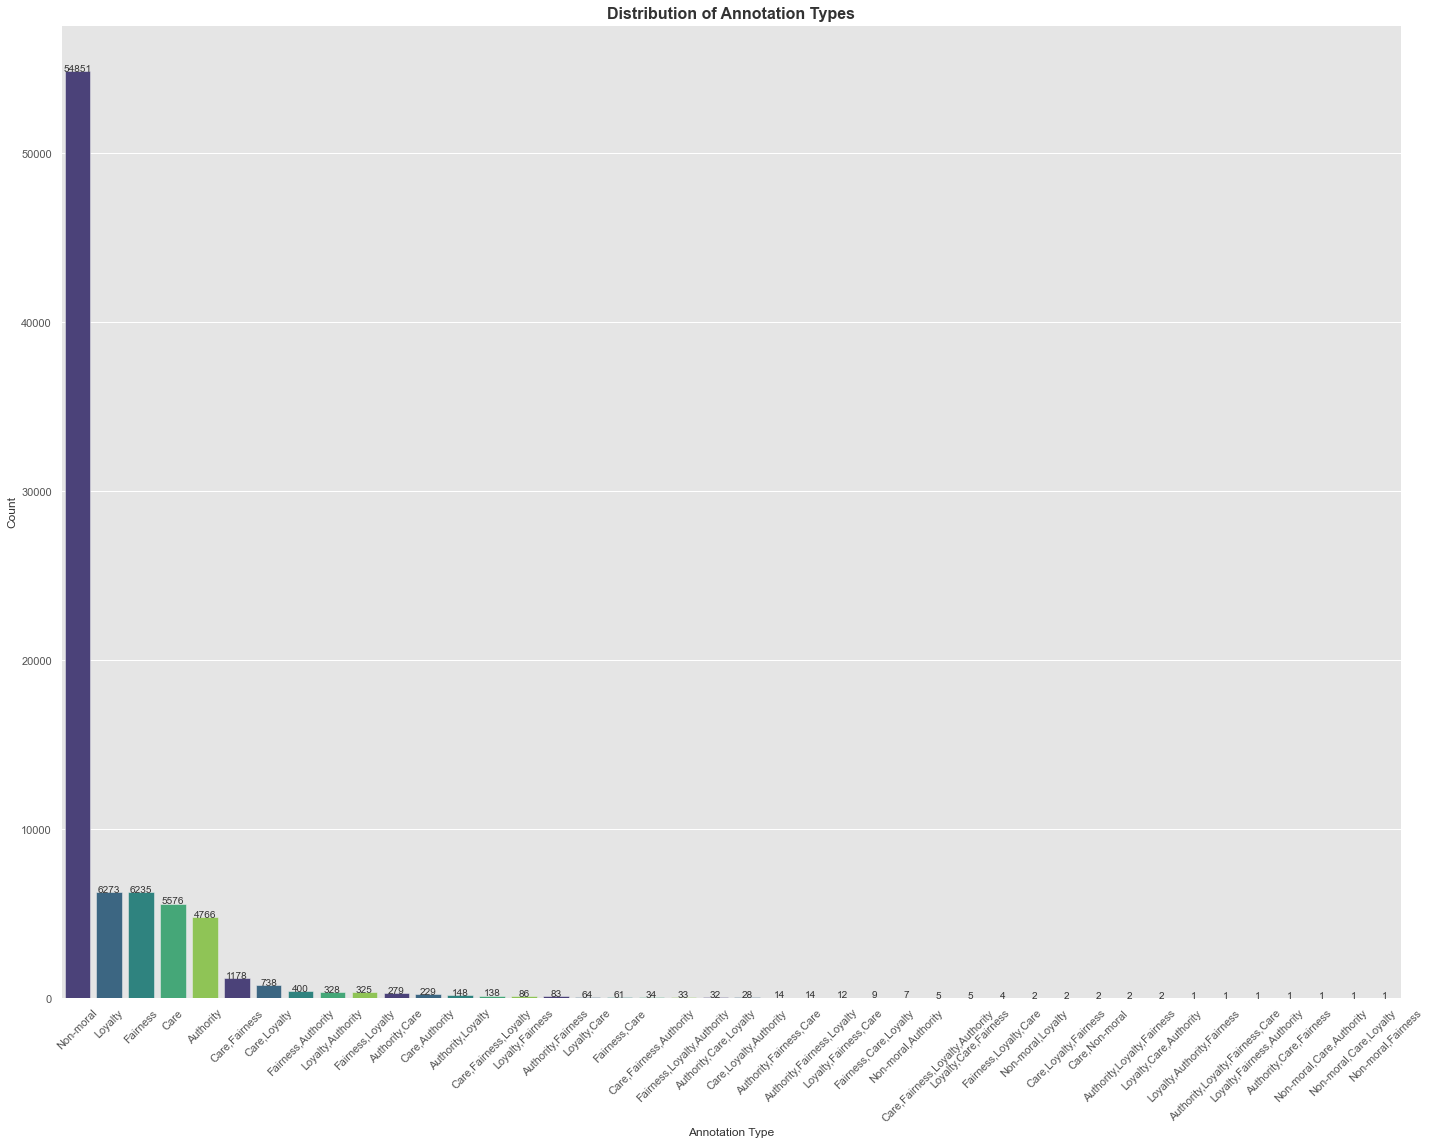

In [36]:
plt.figure(figsize=fig_size)
annotation_counts = sorted_df['annotation'].value_counts().sort_values(ascending=False)
ax = sns.barplot(x=annotation_counts.index, y=annotation_counts.values, palette=colors)
plt.title('Distribution of Annotation Types', fontdict=title_font)
plt.xlabel('Annotation Type', fontdict=label_font)
plt.ylabel('Count', fontdict=label_font)
plt.xticks(rotation=45)

# Add count labels on top of bars
for i, count in enumerate(annotation_counts.values):
    ax.text(i, count + 5, str(count), ha='center', color=text_color)
    
plt.tight_layout()
plt.show()

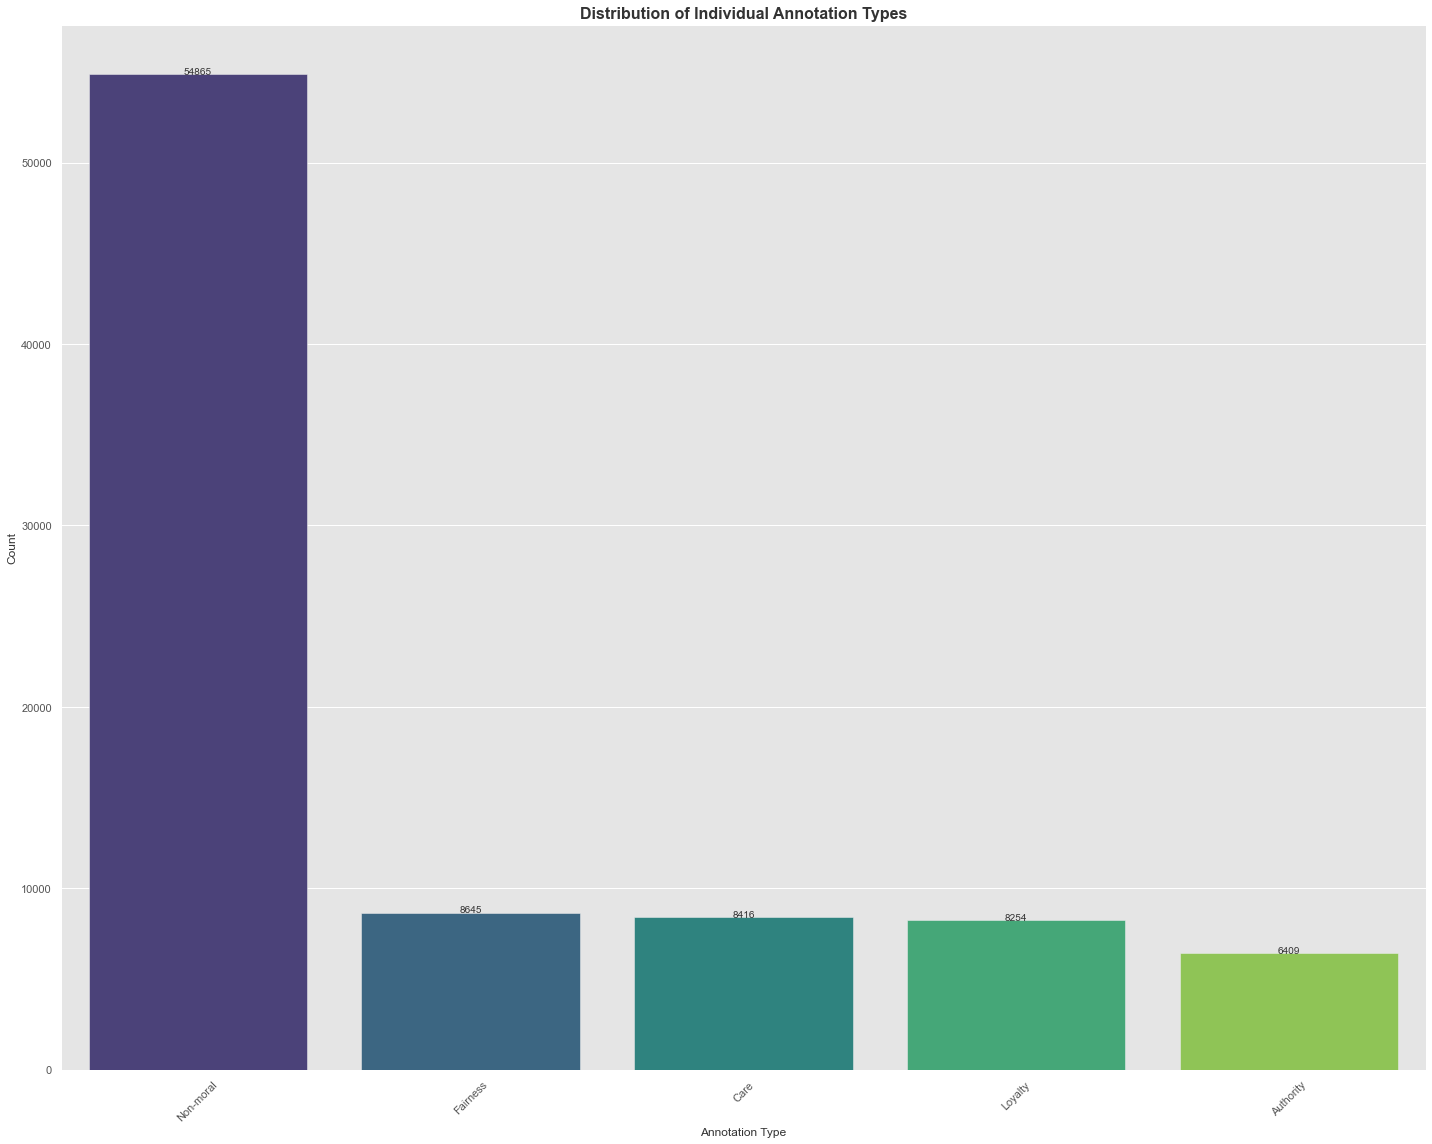

In [37]:
def extract_individual_annotations(annotation_series):
    all_annotations = []
    for annotation in annotation_series:
        if isinstance(annotation, str):
            individual_annotations = annotation.split(',')
            all_annotations.extend(individual_annotations)
    
    annotation_counts = pd.Series(all_annotations).value_counts()
    return annotation_counts

individual_annotation_counts = extract_individual_annotations(sorted_df['annotation'])

plt.figure(figsize=fig_size)
ax = sns.barplot(x=individual_annotation_counts.index, 
                y=individual_annotation_counts.values, 
                palette=colors)
plt.title('Distribution of Individual Annotation Types', fontdict=title_font)
plt.xlabel('Annotation Type', fontdict=label_font)
plt.ylabel('Count', fontdict=label_font)
plt.xticks(rotation=45)

for i, count in enumerate(individual_annotation_counts.values):
    ax.text(i, count + 5, str(count), ha='center', color=text_color)
    
plt.tight_layout()
plt.show()